## `collections.Counter` 

*find the most up-to-date version of this doc [here](https://github.com/IgorHut/Onboarding_homework/blob/master/%20%20%20%20%20Python%20collections%20-%20Counter%20objects.ipynb)*


- `collections` - Python's module which implements specialized container datatypes providing alternatives to general purpose built-in containers like `dict`, `list`, `set`, and `tuple`.
- `namedtuple()` - factory function for creating tuple subclasses with named fields
- `deque` - list-like container with fast appends and pops on either end
- `Counter` - dict subclass for counting hashable objects
- `OrderedDict` - dict subclass that remembers the order entries were added
- `defaultdict` - dict subclass that calls a factory function to supply missing values
- More info [here](https://docs.python.org/2/library/collections.html#module-collections)
- **We'll just check how `counter` objects behave, and in which situations are they considered to be preferable choice over other data structures.** 


#### What is a `counter`?

- As already told `counter` is basicaly a  `dict` subclass for counting hashable objects. 
- A container that keeps track of how many times equivalent values are added.
- Similar to *bags* or *multisets* in other languages.
- Counts are allowed to be any integer value including zero or negative counts. (*Nevertheless, the `Counter` class itself is a dictionary subclass with no restrictions on its keys and values. The values are intended to be numbers representing counts, but you could store anything in the value field.*). 

**In case you wonder what is a hashable object, here is a brief exerpt from the [Python glossary](https://docs.python.org/2/glossary.html):**

*"An object is hashable if it has a hash value which never changes during its lifetime (it needs a __hash__() method), and can be compared to other objects (it needs an __eq__() or __cmp__() method). Hashable objects which compare equal must have the same hash value.*

*Hashability makes an object usable as a dictionary key and a set member, because these data structures use the hash value internally.*

*All of Python’s immutable built-in objects are hashable, while no mutable containers (such as lists or dictionaries) are. Objects which are instances of user-defined classes are hashable by default; they all compare unequal, and their hash value is their id()."*
    

### Initalization

`Counter` supports three basic forms of initialization. Its constructor can be called with a sequence of items, a dictionary containing keys and counts, or using keyword arguments mapping string names to counts.


In [24]:
import collections

print(collections.Counter(['a', 'b', 'c', 'a', 'b', 'b']))
print(collections.Counter({'a':5, 'b':3, 'c':1}))
print(collections.Counter(a=2, b=3, c=1))

Counter({'b': 3, 'a': 2, 'c': 1})
Counter({'a': 5, 'b': 3, 'c': 1})
Counter({'b': 3, 'a': 2, 'c': 1})


As you can see all three methods yield the same result!

In [3]:
# and just for the fun's sake let's see one more way to form a Counter from a string:
print(collections.Counter('abcabb'))

Counter({'b': 3, 'a': 2, 'c': 1})


An empty `Counter` can be constructed with no arguments and populated via the `update()` method.

In [2]:
import collections

c = collections.Counter()
print('Initial :', c)

c.update('abcdaab')
print('Sequence:', c)

c.update({'a':1, 'd':5})
print('Dict:', c) 

Initial : Counter()
Sequence: Counter({'a': 3, 'b': 2, 'c': 1, 'd': 1})
Dict: Counter({'d': 6, 'a': 4, 'b': 2, 'c': 1})


**Notice how count values get increased based on the new data, rather than replaced.** 
In this example, the count for `a` goes from 3 to 4.

Let's check how dict comprehension works with counters:

In [5]:
print(collections.Counter({chr(65+i) : i for i in range(5)}))

#or use tuples as keys:
print(collections.Counter({(k, v): k+v for k in range(4) for v in range(4)}))

Counter({'E': 4, 'D': 3, 'C': 2, 'B': 1, 'A': 0})
Counter({(3, 3): 6, (2, 3): 5, (3, 2): 5, (1, 3): 4, (2, 2): 4, (3, 1): 4, (0, 3): 3, (1, 2): 3, (2, 1): 3, (3, 0): 3, (0, 2): 2, (1, 1): 2, (2, 0): 2, (0, 1): 1, (1, 0): 1, (0, 0): 0})


So there you go, yet "another way" to construct a `Counter`.

### Accessing Counts

Once a `Counter` is populated, its values can be retrieved similary to a `dictionry`.

In [28]:
import collections

c = collections.Counter('abcdaab')

for letter in 'abcde':
    print('%s : %d' % (letter, c[letter]))

a : 3
b : 2
c : 1
d : 1
e : 0


**Important:** Counter does not raise *`KeyError`* for unknown items. If a value has not been seen in the input (as with `e` in this example), its count is 0.

One more thing, setting a count to zero does not remove an element from a counter. Use **`del`** to remove it entirely:

In [11]:
c['a'] = 0
print(c)

del c['a']
print(c)

Counter({'b': 2, 'c': 1, 'd': 1, 'a': 0})
Counter({'b': 2, 'c': 1, 'd': 1})


There are three more methods specific to `Count` objects (i.e. beyond those available for all dictionaries), namely **`elements()`**, **`most_common([n])`**, and **`subtract([iterable-or-mapping])`**.

The **`elements()`** method returns an iterator that produces all of the items known to the `Counter`. The order of elements is not guaranteed, and items with counts less than one are not included.

In [13]:
import collections

c = collections.Counter('Djesbratestaima')
c['z'] = 0
print(c)
print(list(c.elements()))

Counter({'a': 3, 'e': 2, 's': 2, 't': 2, 'D': 1, 'j': 1, 'b': 1, 'r': 1, 'i': 1, 'm': 1, 'z': 0})
['D', 'j', 'e', 'e', 's', 's', 'b', 'r', 'a', 'a', 'a', 't', 't', 'i', 'm']


Use **`most_common([n])`** to produce a sequence of the **n** most frequently encountered input values and their respective counts, from the most common to the least. Leaving out the argument to **`most_common()`** produces a list of all the items, in order of frequency. The following example counts the letters appearing in all of the words in the system dictionary to produce a frequency distribution, then prints the three most common letters.

In [5]:
import collections

c = collections.Counter()
with open('/usr/share/dict/words', 'r') as f:
    for line in f:
        c.update(line.rstrip().lower())

print('Most common:')
for letter, count in c.most_common(3):
    print('%s: %7d' % (letter, count))

Most common:
e:  235331
i:  201032
a:  199554


Since we've already generated this handy `Counter` let's make a bar plot based on it:

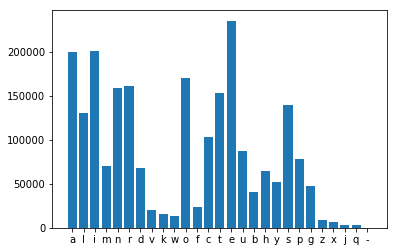

In [8]:
import numpy as np
import matplotlib.pyplot as plt


labels, values = zip(*c.items())

indexes = np.arange(len(labels))

plt.bar(indexes, values)
plt.xticks(indexes, labels)
plt.show()

With **`subtract([iterable-or-mapping])`** elements get subtracted from an iterable or from another mapping (or `counter`). Like `dict.update()` but subtracts counts instead of replacing them. Both inputs and outputs may be zero or negative.

In [30]:
c = collections.Counter(a=4, b=2, c=0, d=-2)
d = collections.Counter(a=-1, b=2, c=3, d=4,y=7)
c.subtract(d)
print(c)

Counter({'a': 5, 'b': 0, 'c': -3, 'd': -6, 'y': -7})


The usual dictionary methods are available for `Counter` objects except for two:

- **`fromkeys()`**:
This class method is not implemented for `Counter` objects.

- **`update()`**:
Like `dict.update()` but adds counts instead of replacing them. 

### Arithmetic

`Counter` instances support arithmetic and set operations for aggregating results.

In [32]:
import collections

c1 = collections.Counter(['a', 'b', 'c', 'a', 'b', 'b'])
c2 = collections.Counter('alphabet')

print('C1:', c1)
print('C2:', c2)

print('\nCombined counts:')
print(c1 + c2)

print('\nSubtraction:')
print(c1 - c2)

print('\nIntersection (taking positive minimums):')
print(c1 & c2)

print('\nUnion (taking maximums):')
print(c1 | c2)

C1: Counter({'b': 3, 'a': 2, 'c': 1})
C2: Counter({'a': 2, 'l': 1, 'p': 1, 'h': 1, 'b': 1, 'e': 1, 't': 1})

Combined counts:
Counter({'a': 4, 'b': 4, 'c': 1, 'l': 1, 'p': 1, 'h': 1, 'e': 1, 't': 1})

Subtraction:
Counter({'b': 2, 'c': 1})

Intersection (taking positive minimums):
Counter({'a': 2, 'b': 1})

Union (taking maximums):
Counter({'b': 3, 'a': 2, 'c': 1, 'l': 1, 'p': 1, 'h': 1, 'e': 1, 't': 1})


Each time a new `Counter` is produced through an operation, any items with zero or negative counts are discarded. The count for **`a`** is the same in **`c1`** and **`c2`**, so subtraction leaves it at zero.

### Few more bionformatic examples and a bit of benchmarking

***Here is a problem, that you all probably know well. We'll provide different solutions and check their performance based on utilized data structures.***

#### Problem 1.
Given [Danio_rerio.Zv9.66.dna.chromosome.12.fa](https://drive.google.com/a/sbgenomics.com/file/d/0B5Jz9JOBzqm-enB5QklLR1VELUU/view?usp=sharing) file determine the following:
* Number of bases in a genome

**Try to code this not using python modules other then built-in ones!**

In [19]:
import collections
import time

filename = '/Users/igorhut/Documents/RNA-Seq/genome/Danio_rerio.Zv9.66.dna.chromosome.12.fa'

# Read in the whole genome into a string. Check how long it takes.
def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            # ignore header line with genome information
            if not line[0] == '>':
                genome += line.rstrip()
    return genome

start = time.time()
genome = readGenome(filename)
end = time.time()

print("With string it takes ", str(end-start), ' seconds to read in the genome.')

# Now count the bases using dictionary
start1=time.time()
dict_count = {}
for base in genome:
    if base in dict_count:
        dict_count[base] += 1
    else:
        dict_count[base] = 1
end1=time.time()
print(dict_count)
print('So using a dictionary for counting bases, in a for loop takes ', str(end1-start1), ' seconds.\n')

# And now count the bases using collections.Counter
start2=time.time()
all_bases = collections.Counter(genome)
end2=time.time()

print('Using a Counter for counting bases takes ', str(end2-start2), ' seconds.')
all_bases  


With string it takes  0.43718695640563965  seconds to read in the genome.
{'A': 16076836, 'G': 9193643, 'T': 16141588, 'C': 9148441, 'N': 136770}
So using a dictionary for counting bases, in a for loop takes  11.484874963760376  seconds.

Using a Counter for counting bases takes  3.4708337783813477  seconds.


Counter({'A': 16076836,
         'C': 9148441,
         'G': 9193643,
         'N': 136770,
         'T': 16141588})

In [20]:
# Read in the whole genome into a Counter. Check how long it takes. 

#Function readGenomeCounter(filename) - takes a FASTA file and fills in the Counter object
def readGenomeCounter(filename):
    genome = collections.Counter()
    with open(filename, 'r') as f:
        for line in f:
            # ignore header line with genome information
            if not line[0] == '>':
                genome.update(line.rstrip())
    return genome

# Make a all_bases Counter object and see how long it takes.
start3=time.time()
all_bases = readGenomeCounter(filename)
end3=time.time()

print("With Counter it takes ", str(end3-start3), ' seconds to read in the genome and count all the bases.')
all_bases


With Counter it takes  5.963536024093628  seconds to read in the genome and count all the bases.


Counter({'A': 16076836,
         'C': 9148441,
         'G': 9193643,
         'N': 136770,
         'T': 16141588})

In [21]:
print("Finally reading the sequence into a string and counting bases with dictionary in a for loop takes", 
     str(end-start + end1-start1), ' seconds vs doing everything in one step with collection.Counter, which takes ',
     str(end3-start3), ' seconds to read in the genome and count all the bases.')

Finally reading the sequence into a string and counting bases with dictionary in a for loop takes 11.922061920166016  seconds vs doing everything in one step with collection.Counter, which takes  5.963536024093628  seconds to read in the genome and count all the bases.


## As you can see the advantage of using collection. Counter is clear in this case, so my children go into the world and use your new knowledge wisely!